IMPORTING LIBRARIES

In [127]:
import pandas as pd
import sklearn as sk
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [ ]:
"""nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')"""

READ FILE

In [113]:
RawData = pd.read_csv('tripadvisor_hotel_reviews.csv')

Concatenate all Reviews

In [114]:
ReviewData = RawData['Review'].tolist()
ReviewString =  ' '.join(ReviewData)

In [115]:
ReviewString = ReviewString.lower()



In [116]:
stopWords = set(stopwords.words('english'))
words = word_tokenize(ReviewString)
wordsFiltered = []
for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

wodsFiltered = ' '.join(wordsFiltered)


In [117]:
from nltk.stem import WordNetLemmatizer
 
Lem = WordNetLemmatizer()

LemText = Lem.lemmatize(wodsFiltered)


In [121]:
ps = PorterStemmer()
CleanTextString = ps.stem(LemText)
CleanText = CleanTextString.split()

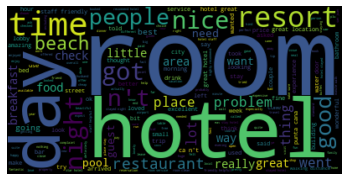

In [128]:
# Start with one review:


# Create and generate a word cloud image:
wordcloud = WordCloud().generate(CleanTextString)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
x_train_counts =  count_vect.fit_transform(CleanText)
x_train_counts.shape


In [ ]:
print(x_train_counts)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

x_train_tfidf =tfidf_transformer.fit_transform(x_train_counts)


In [ ]:
print(x_train_tfidf)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
vec.fit_transfomr(CleanText)
vec.get_feature_names()
L